Урок 6. Градиентный бустинг

Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Задание 3: (опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [1]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
from sklearn.datasets import load_diabetes
from jupyterthemes import jtplot

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
#Разделим выборку на обучающую и тестовую в соотношении 75/25.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
#-------------------------ФУНКЦИИ---------------------------#
#-----------------------Функция №1-------------------------#

#Напишем функцию, реализующую предсказание в градиентном бустинге.
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

#-----------------------Функция №2-------------------------#
#В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

#-----------------------Функция №3-------------------------#
def bias(y, z):
    return (y - z)

#-----------------------Функция №4-------------------------#
#Реализуем функцию обучения градиентного бустинга
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

#-----------------------Функция №5-------------------------#
#Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    #plt.xlim(0, n_trees)
    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    jtplot.style(theme='onedork')
    jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
    plt.show()
#-------------------------ФУНКЦИИ---------------------------#

Построение графика зависимости ошибки от количества деревьев в ансамбле

In [5]:
# Число деревьев в ансамбле
n_trees = [1,2,3,4,5,6,7,8,9,10]
#_ for _ in range(1, 16)
# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

train_errors_list = []
test_errors_list = []

for n_tree in n_trees:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_tree
    trees, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_list.append(train_errors)
    test_errors_list.append(test_errors)

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

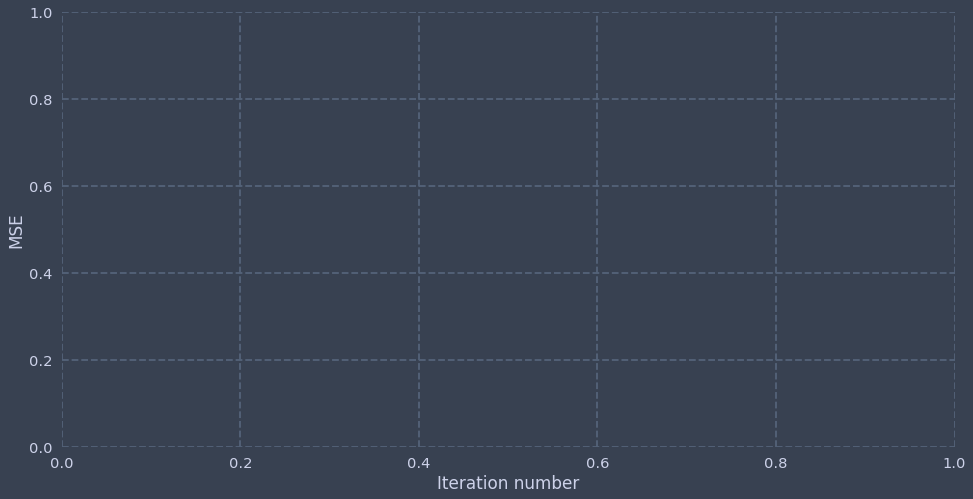

In [12]:
plt.figure(figsize=(16,8))
get_error_plot(n_trees, train_errors_list[-1], test_errors_list[-1])

Построение графика зависимости ошибки от максимальной глубины дерева

In [10]:
# Число деревьев в ансамбле
n_trees = 10
#_ for _ in range(1, 16)
# Максимальная глубина деревьев
max_depth = [1,2,3,4,5,6,7,8,9,10]

# Шаг
eta = 0.1

train_errors_list = []
test_errors_list = []

for depth in max_depth:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_list.append(train_errors)
    test_errors_list.append(test_errors)

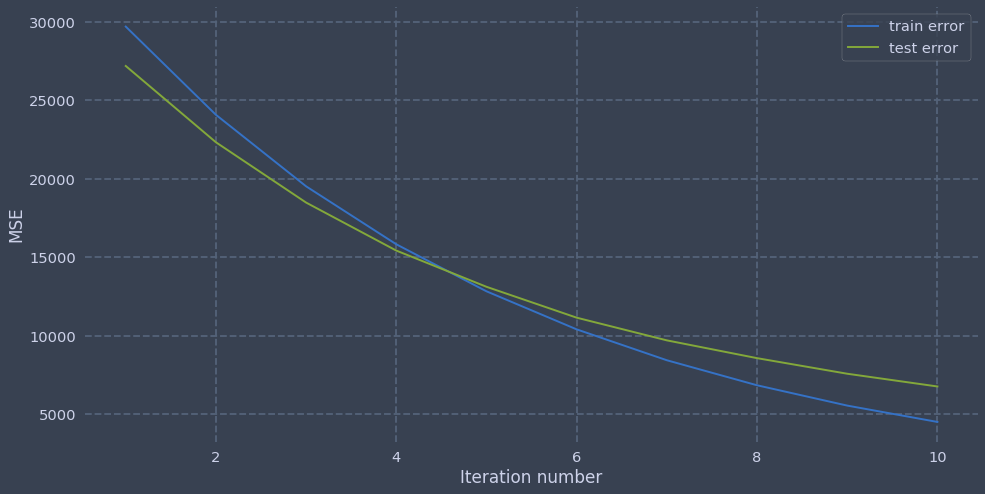

In [11]:
plt.figure(figsize=(16,8))
get_error_plot(max_depth, train_errors_list[-1], test_errors_list[-1])

Вывод: Увеличение числа деревьев и глубины дерева приводит к уменьшению ошибки